# Worksheet 2


**Motive:**

This worksheet is meant to familiarize yourself with Data cleaning and visualization. 

**Additional notes:**

Notebooks consist of a linear sequence of cells. There are three basic cell types:

- Code cells: Input and output of live code that is run in the kernel (Grey color). Code in this cell is executable and '#' is used to write the comment in the code cell. To see the output/run the code cell **Cmd/Ctrl+Enter**

- Markdown cells: Narrative text with embedded LaTeX equations (White color).

- Raw cells: Unformatted text that is included, without modification (White color).

For more information on Jupyter notebook, [Click here](https://www.edureka.co/blog/wp-content/uploads/2018/10/Jupyter_Notebook_CheatSheet_Edureka.pdf)

You should become familiar with reading the comments within the Code cells. This is usually where instructions and explanations are "hidden" on how to get the function to work. A comment in the code cell is preceded by a `\#` to ensure that the comment will not be read when the code is executed. To view the Python documentation for a function, use the `help` function. To run the below code cell, click your mouse anywhere on `print()` and use **Cmd/Ctrl+Enter** to run and view the function's documentation. When you double click the code cell, it would become editable and you can make changes and then run the cell using **Cmd/Ctrl+Enter**.

## Importing Packages

__NOTE:__ For loading the packages into the current Python Jupyter notebook, use `import PACKAGE_NAME` command.  In case it throws an error i.e. `ModuleNotFoundError: No module named 'PACKAGE_NAME'`, then use `!pip install PACKAGE_NAME` in the code chunk to install the same. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium 

plt.rcParams['figure.figsize'] = (14, 10) #Note that we configure a custom default figure size.
#Virtually every default aspect of matplotlib can be customized (https://matplotlib.org/users/customizing.html).

ModuleNotFoundError: No module named 'folium'

## Importing Datasets
**Breweries Dataset**: Use the link ("https://raw.githubusercontent.com/sukhjitsehra/datasets/master/DATA200/Datasets/Breweries.csv") to load the dataset into Python session and name the dataset as "breweries".

**Beers Dataset**: Use the link ("https://raw.githubusercontent.com/sukhjitsehra/datasets/master/DATA100/Datasets/Beers.csv") to load the dataset into Python session and name the dataset as "beers". 

In [ ]:
URL="https://raw.githubusercontent.com/sukhjitsehra/datasets/master/DATA200/Datasets/Beers.csv"
beers=pd.read_csv(URL)
beers.head()

,Content,Type,ID,Flavour,BrewID,12,16,24,32,Other
0,22.000,IBU,1887,Abbey Single Ale,57,Abbey's Single Ale (Current),NaN,NaN,NaN,NaN
1,22.000,IBU,2505,Abbey Single Ale,57,Abbey's Single (2015- ),NaN,NaN,NaN,NaN
2,0.049,AP,1887,Abbey Single Ale,57,Abbey's Single Ale (Current),NaN,NaN,NaN,NaN
3,0.049,AP,2505,Abbey Single Ale,57,Abbey's Single (2015- ),NaN,NaN,NaN,NaN
4,40.000,IBU,502,Altbier,395,Alteration,NaN,NaN,NaN,NaN


In [ ]:
beers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4820 entries, 0 to 4819
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Content  3753 non-null   float64
 1   Type     4820 non-null   object 
 2   ID       4820 non-null   int64  
 3   Flavour  4810 non-null   object 
 4   BrewID   4820 non-null   int64  
 5   12       3052 non-null   object 
 6   16       1682 non-null   object 
 7   24       44 non-null     object 
 8   32       10 non-null     object 
 9   Other    34 non-null     object 
dtypes: float64(1), int64(2), object(7)
memory usage: 376.7+ KB


In [ ]:
URL="https://raw.githubusercontent.com/sukhjitsehra/datasets/master/DATA200/Datasets/Breweries.csv"
breweries=pd.read_csv(URL)
breweries.head()

,Brewery,City,State
0,0/NorthGate Brewing,Minneapolis,MN
1,1/Against the Grain Brewery,Louisville,KY
2,2/Jack's Abby Craft Lagers,Framingham,MA
3,3/Mike Hess Brewing Company,San Diego,CA
4,4/Fort Point Beer Company,San Francisco,CA


In [ ]:
breweries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Brewery  558 non-null    object
 1   City     558 non-null    object
 2   State    558 non-null    object
dtypes: object(3)
memory usage: 13.2+ KB


When you import datasets using read_csv(...) function, Python tried to 'guess' at the variable types. For `beers` and `breweries` dataset, you can see it did quite well. Recall from previous worksheet, once you have imported your data into a Pandas dataframe, you can use below methods to get a sense (explore data) of what the data looks like:

- df.shape():  Prints number of rows and columns in dataframe
- df.head(n): Prints first n rows of the DataFrame
- df.tail(n):  Prints last n rows of the DataFrame
- df.info():   Index, Datatype and Memory information
- df.describe(): Summary statistics for numerical columns
- col_name.value_counts(dropna=False): Views unique values and counts
- df.apply(pd.Series.value_counts):  Unique values and counts for all columns
- df.describe(): Summary statistics for numerical columns

<!-- BEGIN QUESTION -->

### Question 1: 

##### Use the  beers and/or breweries datasets to answer the following:

##### 1)  What is the number of observations in the beers dataset?
##### 2)  What are the five types of `Flavours` that have been most reported in the `beers` dataset?
_Hint: You may need to use value_counts to find the answer. The index of the Series class might be useful._
##### 3) Use the `breweries` dataset to report the top five states with the most number of  breweries. 

_Hint: You may need to use groupby method._

<!--
BEGIN QUESTION
name: q1
points: 1
manual: true
-->

In [ ]:
beers["Flavour"].value_counts().head(5)


<!-- END QUESTION -->

In [ ]:
#Part 1
number_of_observations = beers.shape[0] # SOLUTION 
print(number_of_observations)
#Part 2
top_flavors = beers["Flavour"].value_counts().head(5).index # SOLUTION 
print(top_flavors)
#Part 3
top_states = breweries.groupby(by="State").Brewery.count().sort_values(ascending=False).head(5) # SOLUTION 
print(top_states)

## Part 1: Cleaning and Exploring the Data

- In statistical analysis, the data moves from one state to another before it is analyzed. 
- The first state (**Raw data**) is the data as it comes in. Raw data files may lack column names, contain wrong data types (e.g. numbers stored as strings), wrong category labels, unknown or unexpected character encoding and so on. 
- In short, reading such files into a Python dataframe directly is either difficult or impossible without some sort of preprocessing.
- Once this preprocessing has taken place, data can be deemed ***technically correct***. 
- In this state, data can be read into a dataframe, with correct column names, types, and labels, without further trouble. However, that does not mean that the values are error-free or complete. There are the following 3 rules that must be satisfied for a dataset to be considered 'technically correct':

  - Each variable must have its own column.
  - Each observation must have its own row.
  - Each value must have its own cell.
  
- Even if the data is technically correct but still it may not be consistent data. For example, an age variable may be reported negative, an under-aged person may be registered to possess a driver's license, or data may simply be missing. Such inconsistencies depend on the subject matter that the data pertains to, and they should be ironed out before valid statistical inference from such data can be produced.
  
- ***Consistent data*** is the stage where data is ready for statistical inference. 
- It is technically correct data that most statistical theories use as a starting point. Ideally, such theories can still be applied without taking previous data cleaning steps into account.
- It is the data in which **missing values, special values, (obvious) errors and outliers are either removed, corrected or imputed**. 

Some of the methods mentioned below may be used for cleaning:

- df.columns = ['a','b','c']: Renames columns
- df.isnull(): Checks for null Values, Returns Boolean Array
- df.notnull(): Opposite of df.isnull()
- df.dropna(): Drops all rows that contain null values
- df.dropna(axis=1): Drops all columns that contain null values
- df.dropna(axis=1,thresh=n): Drops all rows have have less than n non-null values
- df.fillna(x): Replaces all null values with x
- df.fillna(df.mean()): Replaces all null values with the mean (mean can be replaced with almost any function from the statistics section)
- df.drop(['column_one'], axis = 1) to drop a column from the dataset
- s.astype(float): Converts the datatype of the series to float
- s.replace(1,'one'): Replaces all values equal to 1 with 'one'
- s.replace([1,3],['one','three']): Replaces all 1 with 'one' and 3 with 'three'
- df.rename(columns=lambda x: x + 1): Mass renaming of columns
- df.rename(columns={'old_name': 'new_ name'}): Selective renaming
- df.set_index('column_one'): Changes the index

<!-- BEGIN QUESTION -->

### Question 2
 
##### 1) Write python code to report the number of null values in all the columns of beer datasets. _Hint: df.isnull().sum() can be used_.

##### 2) Create a data frame named `beers2` by dropping the columns those contain null values. _Hint: df.dropna(axis=0 or 1) can be used_

<!--
BEGIN QUESTION
name: q2
points: 1
manual: true
-->

In [ ]:
beers.isnull().sum() # SOLUTION 
beers2 = beers.dropna(axis=1) # SOLUTION 
beers2

<!-- END QUESTION -->



Moving forward to create technically correct data, we started our discussion on reshaping of dataframe in the previous worksheet using `melt(...)` and `pivot(...)` methods. As you have already seen the structure of beers dataset, do you see any of the following in `beers` and/or `breweries` dataset:

- Column headers are values, not variable names.
- Multiple variables are stored in one column.
- Variables are stored in both rows and columns.
- Multiple types of observational units are stored in the same table.
- A single observational unit is stored in multiple tables.

Let's try to tidy up the breweries dataset as it includes multiple variables in one column "Brewery". The following code used DATAFRAME["COLUMN_NAME"].str.split() method to split the column into two columns and then these are  concatenated with breweries dataframe. The next method (.rename) is used to rename the columns; then .drop method is used to drop the column "Brewery" from the dataframe, and last .astype is used to convert the "BrewID" into integer type.

In addition, the following code is using `chaining method` that removes the use of intermediate temporary variables by putting all methods into a round bracket set `(` and `)`. 

In [ ]:
breweries = (
    pd.concat([breweries, breweries['Brewery'].str.split('/', 1, expand=True)], axis=1)
 .rename(columns={0:"BrewID", 1: "BrewName"})
 .drop('Brewery', axis=1)
 .astype({'BrewID': 'int32'})
)
breweries

,City,State,BrewID,BrewName
0,Minneapolis,MN,0,NorthGate Brewing
1,Louisville,KY,1,Against the Grain Brewery
2,Framingham,MA,2,Jack's Abby Craft Lagers
3,San Diego,CA,3,Mike Hess Brewing Company
4,San Francisco,CA,4,Fort Point Beer Company
...,...,...,...,...
553,Covington,LA,553,Covington Brewhouse
554,Wilson,WI,554,Dave's Brewfarm
555,Ukiah,CA,555,Ukiah Brewing Company
556,Garrattsville,NY,556,Butternuts Beer and Ale


Now, let's tidy up the `beers` dataframe in the next question by taking help from the previous worksheet.

<!-- BEGIN QUESTION -->

### Question 3
 
##### 1) Follow the step to create a tidy beers dataset by:
   1. replacing the last 5  columns with 2 columns called "Volume" and "Name" using the melt(...) method.
   1. excluding the "NA"s in the "Name" variable using .dropna() method. 
   1. setting new index using .set_index(["ID", "Flavour", "BrewID", "Volume", "Name"]) method.
   1. using .pivot(columns="Type")["Content"] command to convert the "Type" variable into 2 separate variables. 
   1. using .reset_index() to create a full dataframe.

_Hint: Try to chaining together the methods mentioned above._ 

##### 2) Filter the beers dataset from above and create a beer24 dataset to only include the beers that are 24 ounces and has only  "BrewID" and "Name" as the variables in it.

<!--
BEGIN QUESTION
name: q3
points: 1
manual: true
-->

In [ ]:
# BEGIN SOLUTION
# Part 1
beers=(beers.melt(id_vars=["Content","Type","ID", "Flavour", "BrewID"], value_vars =["12","16","24","32","Other"],
          var_name="Volume", value_name="Name")
   .dropna(subset=["Name"])
   .set_index(["ID", "Flavour", "BrewID", "Volume", "Name"])
   .pivot(columns="Type")["Content"]
   .reset_index())
# Part 2
beers24=beers[beers["Volume"]=="24"][["BrewID","Name"]]
# END SOLUTION
beers24

Type,BrewID,Name
196,547,Iron Mike Pale Ale
197,547,Boneshaker Brown Ale
251,543,Black Star Double Hopped Golden Lager (24 oz.)
432,449,Blacktop Blonde
433,449,TailGate Hefeweizen
470,449,TailGate IPA
1032,439,Longboard Island Lager
1789,236,Stickin' In My Rye
1822,46,Bengali
1999,134,Boxer


<!-- END QUESTION -->



Let's turn our attention to see how we can extract information that is split into multiple data frames. If you are familiar with SQL then you might be aware of joins. The joins would be used to work with 'smaller' data sets.  Pandas provide a single function, .merge(...), as the entry point for all standard database join operations between DataFrame or named Series objects:

pd.merge(DATA_SET_1,DATA_SET_2,how="inner", on="COMMON_VARIABLE_NAME")

_Note:_

- `how` parameter can be one of 'left', 'right', 'outer', 'inner'. Defaults to 'inner'. 
    - `left`: which keeps all the observations of DATA_SET_1 and, where the "COMMON_VARIABLE" has a matching value, includes the variables from DATA_SET_2 
    - `right`: which keeps all the observations of DATA_SET_2 and, where the "COMMON_VARIABLE" has a matching value, includes the variables from DATA_SET_1
    - `inner`: which only displays DATA_SET_1 and DATA_SET_2 variables for the common values in the "COMMON_VARIABLE".
    - `outer`: which displays all those observations which either have a match in the DATA_SET_1 or DATA_SET_2 dataframe.
- If you are trying to match columns/variables with different names, use left_on="COLUMN_NAME_LEFT" and right_on="COLUMN_NAME_RIGHT" parameters to merge() function.
- Replace all the capital letters appropriately.

Let's test this by joining the beers and breweries datasets using a common variable named "BrewID" and then extracting a sample from them.

<!-- BEGIN QUESTION -->

### Question 4
 
##### 1)  Create a new data set called breweriesCA to include only breweries from California (i.e CA): 

_Hint: To remove the whitespace from "State" Column, you may use breweries["State"].str.strip() command._ 

##### 2)  Use a merge function (join by "BrewID") to display a data set that:

##### a) includes all of the 24 ounce beers and adds the brewery names for those that are brewed in California.

##### b) only includes the 24 ounce beers from California.

##### c) includes all of the California breweries and adds the names of 24 ounce beers.

##### d) includes all of the 24 ounce beers and all of the California breweries.

<!--
BEGIN QUESTION
name: q4
points: 1
manual: true
-->

In [ ]:
#Part 1
breweries["State"] = breweries["State"].str.strip() # SEED
breweriesCA=breweries[breweries["State"]=="CA"] # SOLUTION
breweriesCA
#Part 2
# BEGIN SOLUTION
#a)
pd.merge(beers24, breweriesCA, how="left", on="BrewID")
#b)
pd.merge(beers24, breweriesCA, how="inner", on="BrewID")
#c)
pd.merge(beers24, breweriesCA, how="right", on="BrewID")
#d)
pd.merge(beers24, breweriesCA, how="outer", on="BrewID")

# END SOLUTION

,BrewID,Name,City,State,BrewName
0,547,Iron Mike Pale Ale,NaN,NaN,NaN
1,547,Boneshaker Brown Ale,NaN,NaN,NaN
2,543,Black Star Double Hopped Golden Lager (24 oz.),NaN,NaN,NaN
3,449,Blacktop Blonde,San Diego,CA,TailGate Beer
4,449,TailGate Hefeweizen,San Diego,CA,TailGate Beer
5,449,TailGate IPA,San Diego,CA,TailGate Beer
6,439,Longboard Island Lager,NaN,NaN,NaN
7,236,Stickin' In My Rye,NaN,NaN,NaN
8,46,Bengali,NaN,NaN,NaN
9,134,Boxer,NaN,NaN,NaN


<!-- END QUESTION -->



--- 

## Part 2: Visualization


Matplotlib, Seaborn, and Pandas libraries offer an ideal amalgamation for statistical data visualization. Pandas offer basic functionality for plotting via a `.plot()` method. When this .plot() method is called on a DataFrame object, Matplotlib creates the plot under the hood. 

Whereas, Matplotlib provides full control over the plot to make plot customization easy. Seaborn is a data visualization library built on top of matplotlib and closely integrated with Pandas. It uses fewer syntax and has interesting default themes.

We start with Pandas visualization using the following syntax of plot method:

DATAFRAME.plot(x="COLUMN_1", y="COLUMN_2", kind="line")

The .plot() method has several optional parameters. Most notably, the `kind=` parameter accepts eleven different string values and determines which kind of plot is to be created:

- "area" is for area plots.
- "bar" is for vertical bar charts.
- "barh" is for horizontal bar charts.
- "box" is for box plots.
- "hexbin" is for hexbin plots.
- "hist" is for histograms.
- "kde" is for kernel density estimate charts.
- "density" is an alias for "kde".
- "line" is for line graphs (DEFAULT).
- "pie" is for pie charts.
- "scatter" is for scatter plots.

_Note_: As an alternative to passing strings to the kind parameter of .plot(), DataFrame objects have several methods that you can use to create the various kinds of plots described above:

- .area()
- .bar()
- .barh()
- .box()
- .hexbin()
- .hist()
- .kde()
- .density()
- .line()
- .pie()
- .scatter()
In this notebook, you’ll use the `.plot()` interface and pass strings to the kind parameter. You’re encouraged to try out the methods mentioned above as well.

For quantitative data, we most often use histograms, box plots, and scatter plots. Whereas, for qualitative or categorical data, we most often use bar charts and dot charts. As an example of the built-in plotting functionality of pandas, the following example uses `plot` method of the `Series` class to generate a `barh` plot type to visually display the value counts for `State`.

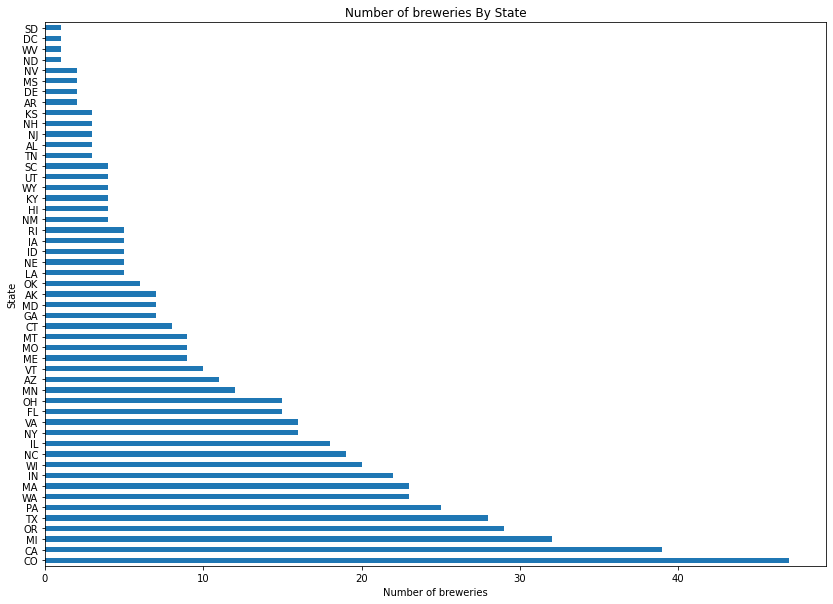

In [ ]:
ax = breweries['State'].value_counts().plot(kind='barh')
ax.set_ylabel("State")
ax.set_xlabel("Number of breweries")
ax.set_title("Number of breweries By State");

You may have noticed that in the previous code cell which involves plotting ends with a semicolon (;). This prevents any extra output from the last line of the cell that we may not want to see. 

Now, let's see the below code that creates a scatter plot between "AP" and "IBU" columns.

<AxesSubplot:xlabel='AP', ylabel='IBU'>

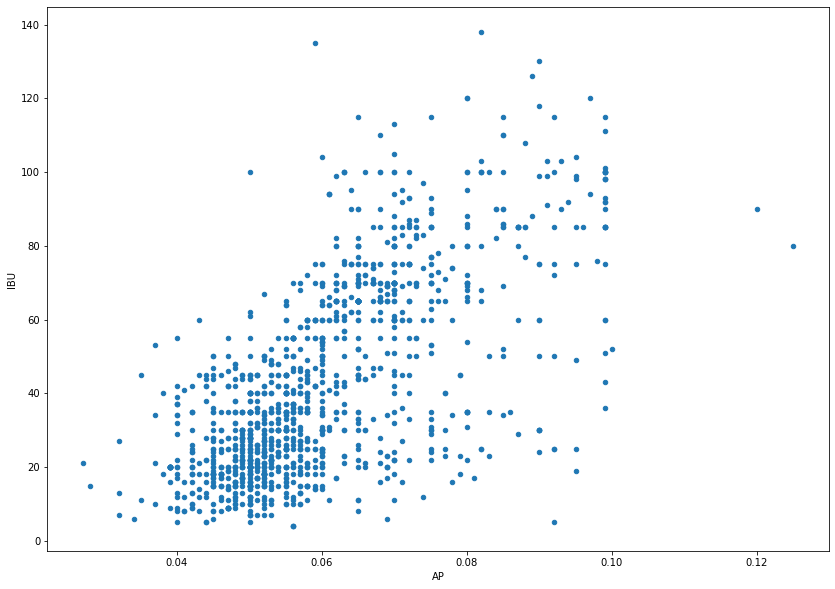

In [ ]:
beers.plot(x="AP", y="IBU",kind="scatter")

Scatterplot is a popular visualization tool that can visualize data containing one or
more variables. But one should be careful about using it on high-volume data. If there is too much data, the structure of the data may become difficult to see in a scatterplot a hexbinplot is sometimes a better alternative. A hexbinplot combines the ideas of scatterplot and histogram. Similar to a scatterplot, a hexbinplot visualizes data in the x-axis and y-axis. Data is placed into hexbins, and the third dimension uses shading to represent the concentration of data in each hexbin. It is used to represent the relationship of 2 numerical variables. Without overlapping the points, the plotting window is split into several hexbins.

<AxesSubplot:xlabel='AP', ylabel='IBU'>

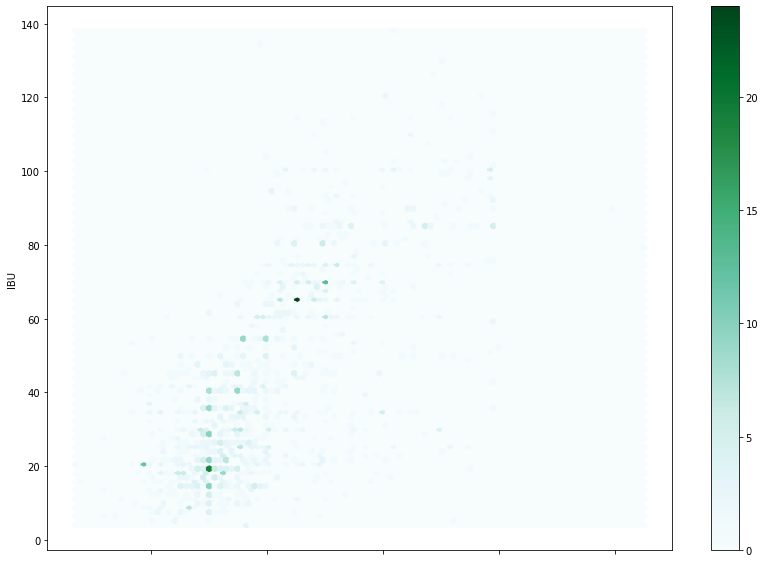

In [ ]:
beers.plot(x="AP", y="IBU",kind="hexbin")

Let's focus on Seaborn, that offers many functions for plotting and can be loaded using the syntax: `import seaborn as sns` and can create a plot using syntax `sns.MethodNameplot(...)`.

Below are some of the plot methods from Seaborn library to create various plots:

- Distribution Plots: 
    - `.distplot()` is used to visualize the parametric distribution of a dataset.
    - `.pairplot()` is used to plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns)
    - `.kdeplot()` creates kernel density estimation plots. These plots replace every single observation with a Gaussian (Normal) distribution centered around that value.
    
- Categorical Plots:
   - `.barplot()` allows you to get aggregate data off a categorical feature in your data. barplot is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:
   - `.countplot()` is the same as barplot except the estimator is explicitly counting the number of occurrences. 
   - `.boxplot()`  shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable.
- Regression Plots:

  - `.lmplot()` is the most basic plot which shows a line along a 2-dimensional plane and is used to see the correlation between two attributes plotted against the x-axis and y-axis.

<!-- BEGIN QUESTION -->

### Question 5

Use the link ("https://raw.githubusercontent.com/sukhjitsehra/datasets/master/DATA200/Datasets/GTA_Apt_Rentals_2018.csv") to load the GTA_Apt_Rentals_2018 dataset into Python session and name the dataset as "gta_rentals". 

The dataset contains 7 columns:
 - Bedrooms: How many bedrooms available
 - Bathrooms: How many bathrooms available
 - Dens: Whether den is available or not
 - Lat: Lattitude
 - Long: Longitude
 - Price: Apartment Rental price per month in CAD
 - Sq. Ft: Square footage (i.e. apartment size)
   
Use this dataset to answer the following:

1. Look at the data type of columns in the dataset.

1. Convert "Bathrooms" and "Bedrooms" columns into categorical variables. _Hint: Use DATAFRAME[COLUMN_NAME].astype("category")_.

1. Use Seaborn library to create count charts for:

     a)  the Bedrooms data
     
     b)  the Bathrooms data 

[Recall: sns.countplot(x="COLUMN_NAME", data=DATA_SET) ]

[Hint: There is no y variable to be stated in a bar chart.]

4. Use the charts to answer the following:
    
    a) In terms of the number of bedrooms, which type of apartment appears to be most common?  

    b) In terms of the number of bathrooms, which type of apartment appears to be most common?

    c) In terms of the number of bathrooms and bedrooms, what would you guess is the most common type of apartment?

    d) What do the bar charts suggest about the skewness of the data for the number of bedrooms and bathrooms?
    
<!--
BEGIN QUESTION
name: q5
points: 1
manual: true
-->

In [ ]:
# Load dataset
gta_rentals=pd.read_csv("https://raw.githubusercontent.com/sukhjitsehra/datasets/master/DATA200/Datasets/GTA_Apt_Rentals_2018.csv") # SOLUTION

#Part 5.1
gta_rentals.info()  # SOLUTION
#Part 5.2
gta_rentals["Bedrooms"] = gta_rentals["Bedrooms"].astype("category") # SOLUTION
gta_rentals["Bathrooms"] = gta_rentals["Bathrooms"].astype("category") # SEED
#Part 5.3a
sns.countplot(x="Bedrooms", data=gta_rentals) # SOLUTION

<!-- END QUESTION -->

In [ ]:
#Part 5.3b
sns.countplot(x="Bathrooms", data=gta_rentals) # SOLUTION

#Part 5.4: Write your answers here

# BEGIN SOLUTION

#a) In terms of the number of bedrooms, which type of apartment appears to be most common?
    
#   1 bedroom

#b) In terms of the number of bathrooms, which type of apartment appears to be most common?

#    1 bathroom
    
#c) In terms of the number of bathrooms and bedrooms, what would you guess is the most common type of apartment?

#    1 bedroom and bathroom
    
#d) What do the bar charts suggest about the skewness of the data for the number of bedrooms and bathrooms?

#    They both appear to be skewed to the right (or positively skewed).

# END SOLUTION

<!-- BEGIN QUESTION -->

### Question 6

Create a boxplot for price of apartments and use the DATAFRAME.describe() command to report the descriptive statistics of:

   1. the price (i.e. monthly cost to rent)
   1. the square footage (i.e. apartment size) data.


Based on the plot and statistics, answer the following:

a) What are the minimum, maximum, mean, and median monthly rental prices of an apartment?
    
b) What is the standard deviation in monthly rental prices?  Logically, does this answer make sense?

c) If the rentals are meant to be for the "average Ontarian", do any of the price data seem "out of place"? That is, are there any extreme outliers? Does a boxplot for the price of the apartment strengthen your judgment?

d) What are the minimum, maximum, mean, and median square feet of an apartment?
    
e) Does any of the square footage data seem "out of place"? That is, are there any extreme outliers? 

    
<!--
BEGIN QUESTION
name: q6
points: 1
manual: true
-->

In [ ]:
# BEGIN SOLUTION
sns.boxplot(x="Price",data=gta_rentals)
gta_rentals.describe()

#a) What are the minimum, maximum, mean, and median monthly rental prices of an apartment?
    
#    $65, $535000, $3627.91, and $2100 are the min, max, mean, and median prices.
    
#b) What is the standard deviation in monthly rental prices?  Logically, does this answer make sense?

#    The standard deviation is $27530.54 which, loosely defined, gives the average distance a rental price is from the mean rental price.  So, the value of $27530.54 does not intuitively make sense.

#c) If the rentals are meant to be for the "average Ontarian", do any of the price data seem "out of place"? That is, are there any extreme outliers? Does boxplot for price of the apartment strengthen your judgment?

#    There are definitely some extreme outliers in both directions.  The min and max values of $65 and $535000 are clearly unrealistic values for monthly apartment rental costs. Yes, a boxplot for the price of the apartment strengthens the judgment.
    
#d) What are the minimum, maximum, mean, and median square feet of an apartment?
    
#    500, 2000, 1180.71, and 1107.5 are the min, max, mean, and median square footages.
    
#e) Does any of the square footage data seem "out of place"? That is, are there any extreme outliers? 
    
#    Looking at the summary, the values all seem reasonable - so, no.

# END SOLUTION

<!-- END QUESTION -->



Now let's look at the `Longitude` (a measure of east/west location on earth) and `Latitude` variables (south/north location on earth) of "gta_rentals" dataset. These two columns provide the geo-spatial location of the apartments on the earth. 

Doing an internet search, it is easy to find that the latitude and longitude on Toronto is approximately 43.7 degrees latitude (north/south), -79.4 degrees longitude (east/west).

To have better visualization, we would use the `Folium` library to display an interactive map along with points plotted on it. You can also zoom-in or zoom-out to understand the data. 

In [ ]:
locations = gta_rentals[['Latitude', 'Longitude']] 
locationlist = locations.values.tolist()
map = folium.Map(location=[43.7,  -79.4], zoom_start=4)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point]).add_to(map)
map

<!-- BEGIN QUESTION -->

### Question 7

Use Seaborn methods to create:
1. Scatter plot with linear model fitting of Latitude vs Longitude
1. Histogram for the latitude data 
1. Histogram for the longitude data
1. Use the .describe(...) method to calculate some descriptive statistics of the latitude and longitude data.

Use the scatterplot, histograms and summaries to answer the following questions.

a) In terms of latitude (i.e. south/north), which range appears most common?

b) In terms of longitude (i.e. east/west), which range appears most common? 

c) What are the mean and median latitude of an apartment in the data set?

d) What are the mean and median longitude of an apartment in the data set?

e) Does any of the data seem "out of place"? That is, are there any extreme outliers? What does this suggest about the data set claiming that the apartments are from the Greater Toronto Area?

<!--
BEGIN QUESTION
name: q7
points: 1
manual: true
-->

In [ ]:
# Scatter plot of Latitude vs Longitude
sns.lmplot(x= "Longitude", y="Latitude",  data=gta_rentals) # SOLUTION

sns.scatterplot(x= "Longitude", y="Latitude",  data=gta_rentals) # OR if you want only scatterplot without linear model # SEED

<!-- END QUESTION -->

In [ ]:
# Histogram for the latitude data 
sns.distplot(gta_rentals["Latitude"]) # SOLUTION

In [ ]:
# Histogram for the longitude data 
sns.distplot(gta_rentals["Longitude"]) # SOLUTION

# descriptive statistics of latitude and longitude data

gta_rentals.describe() # SOLUTION

# Based on the scatterplot, histograms and descriptive statistics answers are discussed below:
# BEGIN SOLUTION
# a) In terms of latitude (i.e. south/north), which range appears most common?
# 43 to 45

# b) In terms of longitude (i.e. east/west), which range appears most common?
# -79 to -81

# c) What are the mean and median latitude of an apartment in the data set?
# The mean is 43.7 while the median is 43.65.

# d) What are the mean and median longitude of an apartment in the data set?
# The mean is -79.50 while the median is -79.39.

# e) Does any of the data seem "out of place"? That is, are there any extreme outliers? What does this suggest about the data set claiming that the apartments are from the Greater Toronto Area?
# There are some extreme outliers in both latitude and longitude which suggests that some of the data is not from the Greater Toronto Area. 
# END SOLUTION

Let's add two new variables in the "gta_rentals" data set:

- The first variable is the difference between each apartment's latitude and Toronto's latitude (call the variable Lat_diff)

- The second variable is similar to the first new variable but using each apartment's longitude (call it Long_diff).

In [ ]:
gta_rentals["Lat_diff"] = gta_rentals["Latitude"] - 43.7
gta_rentals["Long_diff"] = gta_rentals["Longitude"] + 79.4
gta_rentals.info()

Again, doing a quick internet search will reveal that a 1 degree change in latitude is over 100 kilometres change in the distance while, at 79.4 degrees longitude, a 1 degree change is over 80 kilometres change in distance. Also, the Greater Toronto Area encompasses approximately 150 km west to east and 150 km north to south. 

<!-- BEGIN QUESTION -->

### Question 8

Use the .sort_values(...) command to sort the gta_rental's Lat_diff and Long_diff variables to answer how many apartments are:

a) more than 1 degree (i.e. lat_diff > 1) or over 100 km north of Toronto?  

b) more than 1 degree south of Toronto?  

c) more than 2 degrees or over 160 km east of Toronto? 

d) more than 2 degrees or over 160 km west of Toronto? 

[Notice how far some are from Toronto: -34.68 degrees (or ~3000 km) west of Toronto is basically Calgary.]
    
<!--
BEGIN QUESTION
name: q8
points: 1
manual: true
-->

In [ ]:
# BEGIN SOLUTION
gta_rentals["Lat_diff"].sort_values(ascending=False).head(10)
gta_rentals["Lat_diff"].sort_values()
gta_rentals["Long_diff"].sort_values(ascending=False).head(10)
gta_rentals["Long_diff"].sort_values().head(10)

#a) more than 1 degree (i.e. lat_diff > 1) or over 100 km north of Toronto?  
#6

#b) more than 1 degree south of Toronto?  
#0

#c) more than 2 degrees or over 160 km east of Toronto? 
#2

#d) more than 2 degrees or over 160 km west of Toronto? 
#4
# END SOLUTION

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 9

Redefine the gta_rentals data set (call the new data set gta_rentals_filtered), so that it only includes apartments within 1 degree latitude and 2 degrees longitude of Toronto's latitude and longitude stated above.  
_Note: From here on, we will use the gta_rentals_filtered data set when referring to the data._

<!--
BEGIN QUESTION
name: q9
points: 1
manual: true
-->

In [ ]:
gta_rentals_filtered = gta_rentals[(gta_rentals.Lat_diff<1) & (gta_rentals.Lat_diff>-1)] # SOLUTION
gta_rentals_filtered = gta_rentals_filtered[(gta_rentals_filtered.Long_diff<2) & (gta_rentals_filtered.Long_diff>-2)] # SEED
gta_rentals_filtered.info()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 10

Recreate the scatterplot, histograms for the latitudes & longitudes, and use the .describe() command to calculate some descriptive statistics of gta_rentals_filtered data. 

Use the scatterplot, histograms and descriptive statistics to answer the following questions.

 a) How does the range of the new latitude variable compare to your answer in Question 7 above?
 
b) How does the range of the new longitude variable compare to your answer in Question 7 above?

c) How do the mean and median of the new latitude variable compare to your answers in Question 7 above?

d) How do the mean and median of the new longitude variable compare to your answers in Question 7 above? 

e) Looking at your answers to parts c) and d), which appears to be a more 'stable' measure of central tendency when dealing with non-symmetric data and/or outliers?    
<!--
BEGIN QUESTION
name: q10
points: 1
manual: true
-->

In [ ]:
# Scatter plot of Latitude vs Longitude
sns.lmplot(x= "Longitude", y="Latitude",  data=gta_rentals_filtered) # SOLUTION

<!-- END QUESTION -->

In [ ]:
# Histogram for the latitude data 
sns.distplot(gta_rentals_filtered["Latitude"]) # SOLUTION

In [ ]:
# Histogram for the longitude data 
sns.distplot(gta_rentals_filtered["Longitude"]) # SOLUTION

# descriptive statistics of latitude and longitude data

gta_rentals_filtered.describe() # SOLUTION

# Based on the scatterplot, histograms and descriptive statistics answers are discussed below:

# BEGIN SOLUTION
# a) How does the range of the new latitude variable compare to your answer in  Question 7 above?
    
# The range of the new latitude variable is completely contained within the 43 to 45 range (i.e. the GTA) of Exercise 2 and is much more reasonable than the original latitude variable.

# b) How does the range of the new longitude variable compare to your answer in  Question 7 above?
    
# The range of the new latitude variable is almost entirely contained within the -79 to -81 range and much more reasonable than the original longitude variable.

# c) How do the mean and median of the new latitude variable compare to your answers in Question 7 above? 
 
# The original mean of 43.7 and median of 43.65 are now 43.66 and 43.65, respectively (i.e. closer together and data is, therefore, less skewed). 
    
# d) How do the mean and median of the new longitude variable compare to your answers in Question 7 above? 

# The original mean of -79.50 and median of -79.39 are now -79.41 and -79.39, respectively (i.e. closer together and data is, therefore, less skewed). 

# e) Looking at your answers to parts c) and d), which appears to be a more 'stable' measure of central tendency when dealing with non-symmetric data and/or outliers?    
  
# It appears that the median is more stable as it wasn't affected by the presence of outliers in the data set.  The mean, however, was affected - once the outliers were removed it tended towards the median value.

# END SOLUTION